**CS560 - Algorithms and Their Analysis**
<br>
Date: **16 April 2021**
<br>

Title: **Seminar 10**
<br>
Speaker: **Dr. Shota Tsiskaridze**



 **Chapter 22-24**. Cormen, Thomas H. and Leiserson, Charles Eric and Rivest, Ronald Linn and Stein, Clifford Seth, *Introduction to Algorithms, 3rd Edition*, MIT Press, 2009
 


<h1 align="center">Elementary Graph Algorithms</h1>

<h3 align="center">Representations of Graphs</h3>

- Python has **no built-in data type or class for graphs**, but it is easy to implement them in **Python**. 


- One data type is ideal for representing graphs in Python, i.e. **dictionaries**: 

In [1]:
graph = { "a" : ["c"],
          "b" : ["c", "e"],
          "c" : ["a", "b", "d", "e"],
          "d" : ["c"],
          "e" : ["c", "b"],
          "f" : []
        }

graph

{'a': ['c'],
 'b': ['c', 'e'],
 'c': ['a', 'b', 'd', 'e'],
 'd': ['c'],
 'e': ['c', 'b'],
 'f': []}

- The following function **generates** the **list of all edges**:

In [2]:
def generate_edges(graph):
    edges = []
    for node in graph:
        for neighbour in graph[node]:
            edges.append((node, neighbour))

    return edges

edges = generate_edges(graph)
edges

[('a', 'c'),
 ('b', 'c'),
 ('b', 'e'),
 ('c', 'a'),
 ('c', 'b'),
 ('c', 'd'),
 ('c', 'e'),
 ('d', 'c'),
 ('e', 'c'),
 ('e', 'b')]

- As we can see, there is **no edge containing the node $f$**. 


- $f$ is an **isolated node** of our graph.


- The following function **calculates** the **isolated nodes**:

In [3]:
def find_isolated_nodes(graph):
    isolated = []
    for node in graph:
        if not graph[node]:
            isolated += node
    return isolated

find_isolated_nodes(graph)

['f']

- Let's now implement a class to represent the graph:

In [16]:
class Graph(object):

    def __init__(self, graph_dict=None):
        """ initializes a graph object 
            If no dictionary or None is given, 
            an empty dictionary will be used
        """
        if graph_dict == None:
            graph_dict = {}
        self.__graph_dict = graph_dict

    def vertices(self):
        """ returns the vertices of a graph """
        return list(self.__graph_dict.keys())

    def edges(self):
        """ returns the edges of a graph """
        return self.__generate_edges()

    def add_vertex(self, vertex):
        """ If the vertex "vertex" is not in 
            self.__graph_dict, a key "vertex" with an empty
            list as a value is added to the dictionary. 
            Otherwise nothing has to be done. 
        """
        if vertex not in self.__graph_dict:
            self.__graph_dict[vertex] = []

    def add_edge(self, edge):
        """ assumes that edge is of type set, tuple or list; 
            between two vertices can be multiple edges! 
        """
        edge = set(edge)
        (vertex1, vertex2) = tuple(edge)

        if vertex2 not in self.__graph_dict:
            self.__graph_dict[vertex2] = []
             
        if vertex1 in self.__graph_dict:
            self.__graph_dict[vertex1].append(vertex2)
        else: 
            self.__graph_dict[vertex1] = [vertex2]
        

    def __generate_edges(self):
        """ A static method generating the edges of the 
            graph "graph". Edges are represented as sets 
            with one (a loop back to the vertex) or two 
            vertices 
        """
        edges = []
        for vertex in self.__graph_dict:
            for neighbour in self.__graph_dict[vertex]:
                if {neighbour, vertex} not in edges:
                    edges.append((vertex, neighbour))
        return edges

    def __str__(self):
        res = "vertices: "
        for k in self.__graph_dict:
            res += str(k) + " "
        res += "\nedges: "
        for edge in self.__generate_edges():
            res += str(edge) + " "
        return res

In [17]:
if __name__ == "__main__":

    g = { "a" : ["d"],
          "b" : ["c"],
          "c" : ["b", "c", "d", "e"],
          "d" : ["a", "c"],
          "e" : ["c"],
          "f" : []
        }


    graph = Graph(g)

    print("Vertices of graph:")
    print(graph.vertices(), '\n')

    print("Edges of graph:")
    print(graph.edges(), '\n')

    print("Add vertex:")
    graph.add_vertex("z")

    print("Vertices of graph:")
    print(graph.vertices(), '\n')
 
    print("Add an edge:")
    graph.add_edge(("a","z"))
    
    print("Edges of graph:")
    print(graph.edges(), '\n')

    print('Adding an edge ("x","y") with new vertices:')
    graph.add_edge(("x","y"))
    
    print("Vertices of graph:")
    print(graph.vertices(), '\n')
    
    print("Edges of graph:")
    print(graph.edges(), '\n')

Vertices of graph:
['a', 'b', 'c', 'd', 'e', 'f'] 

Edges of graph:
[('a', 'd'), ('b', 'c'), ('c', 'b'), ('c', 'c'), ('c', 'd'), ('c', 'e'), ('d', 'a'), ('d', 'c'), ('e', 'c')] 

Add vertex:
Vertices of graph:
['a', 'b', 'c', 'd', 'e', 'f', 'z'] 

Add an edge:
Edges of graph:
[('a', 'd'), ('a', 'z'), ('b', 'c'), ('c', 'b'), ('c', 'c'), ('c', 'd'), ('c', 'e'), ('d', 'a'), ('d', 'c'), ('e', 'c')] 

Adding an edge ("x","y") with new vertices:
Vertices of graph:
['a', 'b', 'c', 'd', 'e', 'f', 'z', 'y', 'x'] 

Edges of graph:
[('a', 'd'), ('a', 'z'), ('b', 'c'), ('c', 'b'), ('c', 'c'), ('c', 'd'), ('c', 'e'), ('d', 'a'), ('d', 'c'), ('e', 'c'), ('x', 'y')] 



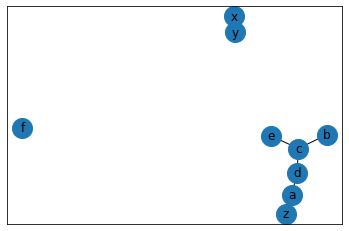

In [18]:
import networkx as nx
import matplotlib.pyplot as plt


G = nx.Graph()
G.add_nodes_from(graph.vertices())
G.add_edges_from(graph.edges())

nx.draw_networkx(G, node_size = 400, )
plt.show()


Student ID = 1:

   Search Algorithm = The Bellman-Ford Algorithm


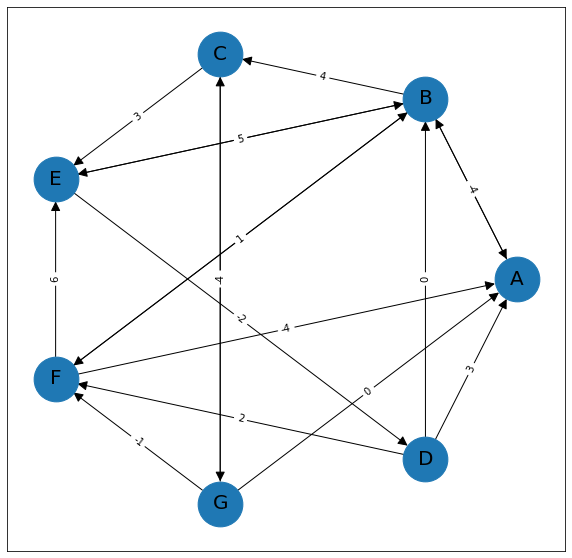

In [20]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pylab

for s in range (1,2):
  
    print(f"\nStudent ID = {s}:")
    Algorithm = ['The Bellman-Ford Algorithm', "Dijkstra’s Algorithm"]
    Alg = Algorithm[np.random.randint(2)]
    print(f"\n   Search Algorithm = {Alg}")
    
    G = nx.DiGraph()

    V = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
    
    weighted = True
    
    for u in V:
        for v in V:

            edge= np.random.randint(3)
            
            if not edge:
                
                if weighted:
                    if Alg == 'Dijkstra’s Algorithm':
                        w = np.random.randint(1, 10)
                    else:
                        w = np.random.randint(-5, 10)
                else:
                    w = 1
                G.add_edges_from([(u, v)], weight= w)

    edge_labels=dict([((u,v,),d['weight'])
                 for u,v,d in G.edges(data=True)])

    red_edges = [('C','D'),('D','A')]

    plt.figure(1,figsize=(10,10))

    pos=nx.circular_layout(G)

    arrows = True

    nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)

    nx.draw_networkx(G,pos, node_size=2000, arrowsize = 20, font_size = 20, arrows = arrows)

    pylab.show()

<h3 align="center">Breadth-First Search</h3>

  <img src="images/L10_BFS_Pseudocode.png" width="400" alt="Example" />

  <img src="images/L10_BFS_Operates.png" width="1000" alt="Example" />

In [21]:
graph = { "r" : ["s", "v"],
          "s" : ["r", "w"],
          "t" : ["u", "w", "x"],
          "u" : ["t", "x", "y"],
          "v" : ["t"],
          "w" : ["s", "t", "x"],
          "x" : ["t", "u", "w", "y"],
          "y" : ["u", "x"],
        }

visited = [] # List to keep track of visited nodes.
queue = []     #Initialize a queue

def BFS(visited, graph, node):
    visited.append(node)
    queue.append(node)

    while queue:
        s = queue.pop(0) 
        print (s, end = " ") 

        for neighbour in graph[s]:
            if neighbour not in visited:
                visited.append(neighbour)
                queue.append(neighbour)

BFS(visited, graph, 'r')

r s v w t x u y 

<h3 align="center">Depth-First Search</h3>


  <img src="images/L10_DFS_Pseudocode.png" width="600" alt="Example" />


  <img src="images/L10_DFS_Operates.png" width="1000" alt="Example" />

In [ ]:
graph = { "u" : ["v", "x"],
          "v" : ["y"],
          "w" : ["y", "z"],
          "x" : [],
          "y" : ["x"],
          "z" : ["z"]
        }

visited = set() # Set to keep track of visited nodes.

def DFS(visited, graph, node):
    if node not in visited:
        print(node, end = " ") 
        visited.add(node)
        for neighbour in graph[node]:
            dfs(visited, graph, neighbour)

# Driver Code
DFS(visited, graph, 'u')

<h3 align="center">Topological Sort</h3>

- A **topological sort** of a **directed acycle graph** (DAG) $G = (V, E)$ is a **linear ordering** of all its vertices such that if $G$ contains an edge $(u, v)$, then $u$ appears before $v$ in the ordering.


- An example of topological sort is presented below.  

  When Professor Bumstead gets dressed in the morning, he must don certain garments before other, e.g., socks before shoes.

  A directed edge $(u, v)$ in the dag of indicates that garment $u$ must be donned before garment $v$. 
  
  A topological sort of this dag therefore gives an order for getting dressed.

  <img src="images/S11_Topological_Sort_Execution.png" width="1000" alt="Example" />


- The following simple algorithm topologically sorts a dag:

  <img src="images/S11_Topological_Sort.png" width="600" alt="Example" />


In [ ]:
#Python program to print topological sorting of a DAG 
from collections import defaultdict 
  
#Class to represent a graph 
class Graph: 
    def __init__(self,vertices): 
        self.graph = defaultdict(list) #dictionary containing adjacency List 
        self.V = vertices #No. of vertices 
  
    # function to add an edge to graph 
    def addEdge(self,u,v): 
        self.graph[u].append(v) 
  
    # A recursive function used by topologicalSort 
    def topologicalSortUtil(self,v,visited,stack): 
  
        # Mark the current node as visited. 
        visited[v] = True
  
        # Recur for all the vertices adjacent to this vertex 
        for i in self.graph[v]: 
            if visited[i] == False: 
                self.topologicalSortUtil(i,visited,stack) 
  
        # Push current vertex to stack which stores result 
        stack.insert(0,v) 
  
    # The function to do Topological Sort. It uses recursive topologicalSortUtil() 
    def topologicalSort(self): 
        # Mark all the vertices as not visited 
        visited = [False]*self.V 
        stack =[] 
  
        # Call the recursive helper function to store Topological 
        # Sort starting from all vertices one by one 
        for i in range(self.V): 
            if visited[i] == False: 
                self.topologicalSortUtil(i,visited,stack) 
  
        # Print contents of stack 
        print(stack)

In [ ]:
g= Graph(6)
g.addEdge(5, 2); 
g.addEdge(5, 0); 
g.addEdge(4, 0); 
g.addEdge(4, 1); 
g.addEdge(2, 3); 
g.addEdge(3, 1); 
  
g.topologicalSort() 

<h1 align="center">Minimum Spanning Trees</h1>

<h3 align="center">Kruskal’s Algorithm</h3>

- The **Pseoudocode** for `MST-Kruskal` is as follows:

    <img src="images/L11_Kruskal.png" width="700" alt="Example" />
    

- An example of **Kruskal's algorithm execution** on the graph is shown below:

  <img src="images/L11_Kruskal_Execution.png" width="900" alt="Example" />

In [ ]:
from collections import defaultdict
 
# Class to represent a graph
class Graph:
 
    def __init__(self, vertices):
        self.V = vertices  # No. of vertices
        self.graph = []    # default dictionary to store graph
 
    # function to add an edge to graph
    def addEdge(self, u, v, w):
        self.graph.append([u, v, w])
 
    # A utility function to find set of an element i (uses path compression technique)
    def find(self, parent, i):
        if parent[i] == i:
            return i
        return self.find(parent, parent[i])
 
    # A function that does union of two sets of x and y (uses union by rank)
    def union(self, parent, rank, x, y):
        xroot = self.find(parent, x)
        yroot = self.find(parent, y)
 
        # Attach smaller rank tree under root of high rank tree (uses union by rank)
        if rank[xroot] < rank[yroot]:
            parent[xroot] = yroot
        elif rank[xroot] > rank[yroot]:
            parent[yroot] = xroot
 
        # If ranks are same, then make one as root and increment its rank by one
        else:
            parent[yroot] = xroot
            rank[xroot] += 1
 
    # The main function to construct MST using Kruskal's algorithm
    def MSTKruskal(self):
 
        result = []  # This will store the resultant MST
        i = 0        # An index variable, used for sorted edges
        e = 0        # An index variable, used for result[]
 
        
        # Step 1:  Sort all the edges in  non-decreasing order of their weight.  
        #If we are not allowed to change the given graph, we can create a copy of graph
        self.graph = sorted(self.graph, key=lambda item: item[2])
 
        parent = []
        rank = []
 
        # Create V subsets with single elements
        for node in range(self.V):
            parent.append(node)
            rank.append(0)
 
        # Number of edges to be taken is equal to V-1
        while e < self.V - 1:
 
            # Step 2: Pick the smallest edge and increment the index for next iteration
            u, v, w = self.graph[i]
            i = i + 1
            x = self.find(parent, u)
            y = self.find(parent, v)
 
            # If including this edge does't cause cycle, include it in result and increment the indexof result for next edge
            if x != y:
                e = e + 1
                result.append([u, v, w])
                self.union(parent, rank, x, y)
            
            # Else discard the edge
 
        minimumCost = 0
        print("Edges in the constructed MST")
        for u, v, weight in result:
            minimumCost += weight
            print("%d -- %d == %d" % (u, v, weight))
        print("Minimum Spanning Tree" , minimumCost)

# Initialize Graph
G = Graph(4)
G.addEdge(0, 1, 10)
G.addEdge(0, 2, 6)
G.addEdge(0, 3, 5)
G.addEdge(1, 3, 15)
G.addEdge(2, 3, 4)
 
# Function call
G.MSTKruskal()

<h3 align="center">Prim’s Algorithm</h3>

- The **Pseoudocode** for `MST-Prim` is as follows:

    <img src="images/L11_Prim.png" width="500" alt="Example" />
    

- An example of **Prim's algorithm execution** on the graph is shown below:

  <img src="images/L11_Prim_Execution.png" width="1000" alt="Example" />

In [ ]:
import sys # Library for INT_MAX 
  
class Graph(): 
  
    def __init__(self, vertices): 
        self.V = vertices 
        self.graph = [[0 for column in range(vertices)] for row in range(vertices)] 
  
    # A utility function to print the constructed MST stored in parent[] 
    def printMST(self, parent): 
        print("Edge \tWeight")
        for i in range(1, self.V): 
            print(parent[i], "-", i, "\t", self.graph[i][ parent[i] ])
  
    # A utility function to find the vertex with minimum distance value, 
    # from the set of vertices not yet included in shortest path tree 
    def minKey(self, key, mstSet): 
  
        # Initilaize min value 
        min = sys.maxsize 
  
        for v in range(self.V): 
            if key[v] < min and mstSet[v] == False: 
                min = key[v] 
                min_index = v 
  
        return min_index 
  
    # Function to construct and print MST for a graph represented using adjacency matrix representation 
    def MSTPrim(self): 
  
        # Key values used to pick minimum weight edge in cut 
        key = [sys.maxsize] * self.V 
        parent = [None] * self.V   # Array to store constructed MST 
        key[0] = 0                 # Make key 0 so that this vertex is picked as first vertex 
        mstSet = [False] * self.V 
  
        parent[0] = -1             # First node is always the root of 
  
        for cout in range(self.V): 
  
            # Pick the minimum distance vertex from the set of vertices not yet processed.  
            # u is always equal to src in first iteration 
            u = self.minKey(key, mstSet) 
  
            # Put the minimum distance vertex in the shortest path tree 
            mstSet[u] = True
  
            # Update dist value of the adjacent vertices of the picked vertex only if 
            # the current distance is greater than new distance and the vertex in not in the shotest path tree 
            for v in range(self.V): 
  
                # graph[u][v] is non zero only for adjacent vertices of m 
                # mstSet[v] is false for vertices not yet included in MST 
                # Update the key only if graph[u][v] is smaller than key[v] 
                if self.graph[u][v] > 0 and mstSet[v] == False and key[v] > self.graph[u][v]: 
                        key[v] = self.graph[u][v] 
                        parent[v] = u 
  
        self.printMST(parent)
    
G = Graph(9) 

           # a,  b,  c,  d,  e,  f,  g,  h,  i
G.graph = [ [0,  4,  0,  0,  0,  0,  0,  8,  0], #a
            [4,  0,  8,  0,  0,  0,  0, 11,  0], #b
            [0,  8,  0,  7,  0,  4,  0,  0,  2], #c
            [0,  0,  7,  0,  9, 14,  0,  0,  0], #d
            [0,  0,  0,  9,  0, 10,  0,  0,  0], #e
            [0,  0,  4, 14, 10,  0,  2,  0,  0], #f
            [0,  0,  0,  0,  0,  2,  0,  1,  6], #g
            [8, 11,  0,  0,  0,  0,  1,  0,  7], #h
            [0,  0,  2,  0,  0,  0,  6,  7,  0]] #i
  
G.MSTPrim(); 

<h1 align="center">Single-Source Shortest Paths</h1>

<h3 align="center">The Bellman-Ford Algorithm</h3>

- The **Pseoudocode** for `Bellman-Ford` is as follows:

  <img src="images/L12_Pseudocode_Bellman_Ford.png" width="500" alt="Example" />


- The execution of the Bellman-Ford algorithm is shown below:

  <img src="images/L12_Execution_Bellman_Ford.png" width="1000" alt="Example" />

In [ ]:
# Python3 program for Bellman-Ford's single source  
# shortest path algorithm.  
  
# Class to represent a graph  
class Graph:  
  
    def __init__(self, vertices):  
        self.V = vertices # No. of vertices  
        self.graph = []  
  
    # function to add an edge to graph  
    def addEdge(self, u, v, w):  
        self.graph.append([u, v, w])  
          
    # utility function used to print the solution  
    def printArr(self, dist):  
        print("Vertex Distance from Source")  
        for i in range(self.V):  
            print("{0}\t\t{1}".format(i, dist[i]))  
      
    # The main function that finds shortest distances from src to  
    # all other vertices using Bellman-Ford algorithm. The function  
    # also detects negative weight cycle  
    def BellmanFord(self, src):  
  
        # Step 1: Initialize distances from src to all other vertices  
        # as INFINITE  
        dist = [float("Inf")] * self.V  
        dist[src] = 0
  
  
        # Step 2: Relax all edges |V| - 1 times. A simple shortest  
        # path from src to any other vertex can have at-most |V| - 1  
        # edges  
        for _ in range(self.V - 1):  
            # Update dist value and parent index of the adjacent vertices of  
            # the picked vertex. Consider only those vertices which are still in  
            # queue  
            for u, v, w in self.graph:  
                if dist[u] != float("Inf") and dist[u] + w < dist[v]:  
                        dist[v] = dist[u] + w  
  
        # Step 3: check for negative-weight cycles. The above step  
        # guarantees shortest distances if graph doesn't contain  
        # negative weight cycle. If we get a shorter path, then there  
        # is a cycle.  
  
        for u, v, w in self.graph:  
                if dist[u] != float("Inf") and dist[u] + w < dist[v]:  
                        print("Graph contains negative weight cycle") 
                        return
                          
        # print all distance  
        self.printArr(dist)
        
g = Graph(5)  
g.addEdge(0, 1,  6)  # s -> t
g.addEdge(0, 3,  7)  # s -> y
g.addEdge(1, 2,  5)  # t -> x
g.addEdge(1, 3,  8)  # t -> y
g.addEdge(1, 4, -4)  # t -> z
g.addEdge(2, 1, -2)  # x -> t
g.addEdge(3, 2, -3)  # y -> x
g.addEdge(3, 4,  9)  # y -> z
g.addEdge(4, 0,  2)  # z -> s
g.addEdge(4, 2,  7)  # z -> x

  
# Print the solution  
g.BellmanFord(0)  

<h3 align="center">Single-Source Shortest Paths in Directed Acyclic Graphs</h3>

- The **Pseoudocode** for `Dag-Shortest-Path` is as follows:

  <img src="images/L12_Pseudocode_DAG.png" width="600" alt="Example" />
  
  - The execution of the **DAG-Shortest-Path** algorithm is shown below:

  <img src="images/L12_Execution_DAG.png" width="1000" alt="Example" />

In [1]:
# Python program to find single source shortest paths 
# for Directed Acyclic Graphs Complexity :OV(V+E) 
from collections import defaultdict 
  
# Graph is represented using adjacency list. Every 
# node of adjacency list contains vertex number of 
# the vertex to which edge connects. It also contains 
# weight of the edge 
class Graph: 
    def __init__(self,vertices): 
  
        self.V = vertices # No. of vertices 
  
        # dictionary containing adjacency List 
        self.graph = defaultdict(list) 
  
    # function to add an edge to graph 
    def addEdge(self,u,v,w): 
        self.graph[u].append((v,w)) 
  
  
    # A recursive function used by shortestPath 
    def topologicalSortUtil(self,v,visited,stack): 
  
        # Mark the current node as visited. 
        visited[v] = True
  
        # Recur for all the vertices adjacent to this vertex 
        if v in self.graph.keys(): 
            for node,weight in self.graph[v]: 
                if visited[node] == False: 
                    self.topologicalSortUtil(node,visited,stack) 
  
        # Push current vertex to stack which stores topological sort 
        stack.append(v) 
  
  
    ''' The function to find shortest paths from given vertex. 
        It uses recursive topologicalSortUtil() to get topological 
        sorting of given graph.'''
    def dagShortestPath(self, s): 
  
        # Mark all the vertices as not visited 
        visited = [False]*self.V 
        stack =[] 
  
        # Call the recursive helper function to store Topological 
        # Sort starting from source vertice 
        for i in range(self.V): 
            if visited[i] == False: 
                self.topologicalSortUtil(s,visited,stack) 
  
        # Initialize distances to all vertices as infinite and 
        # distance to source as 0 
        dist = [float("Inf")] * (self.V) 
        dist[s] = 0
  
        # Process vertices in topological order 
        while stack: 
  
            # Get the next vertex from topological order 
            i = stack.pop() 
  
            # Update distances of all adjacent vertices 
            for node,weight in self.graph[i]: 
                if dist[node] > dist[i] + weight: 
                    dist[node] = dist[i] + weight 
  
        # Print the calculated shortest distances 
        for i in range(self.V): 
            print ("%d" %dist[i]) if dist[i] != float("Inf") else  "Inf" , 
  
  
g = Graph(6)
g.addEdge(0, 1,  5)  # r -> s
g.addEdge(0, 2,  3)  # r -> t
g.addEdge(1, 2,  2)  # s -> t
g.addEdge(1, 3,  6)  # s -> x
g.addEdge(2, 3,  7)  # t -> x
g.addEdge(2, 4,  4)  # t -> y
g.addEdge(2, 5,  2)  # t -> z
g.addEdge(3, 4, -1)  # x -> y
g.addEdge(3, 5,  1)  # x -> z
g.addEdge(4, 5, -2)  # y -> z
  
# source = 1 
s = 1
  
print ("Following are shortest distances from source %d " % s) 
g.dagShortestPath(s)

Following are shortest distances from source 1 
0
2
6
5
3


<h3 align="center">Dijkstra’s Algorithm</h3>

- The **Pseoudocode** for `Dijkstra` is as follows:


  <img src="images/L12_Pseudocode_Dijekstra.png" width="500" alt="Example" />


- The execution of the **Dijekstra** algorithm is shown below:

  <img src="images/L12_Execution_Dijekstra.png" width="1000" alt="Example" />

In [ ]:
import sys 
   
class Graph(): 
   
    def __init__(self, vertices): 
        self.V = vertices 
        self.graph = [[0 for column in range(vertices)]  
                    for row in range(vertices)] 
   
    def printSolution(self, dist): 
        print ("Vertex tDistance from Source") 
        for node in range(self.V): 
            print (node, ": dist =", dist[node]) 
   
    # A utility function to find the vertex with  
    # minimum distance value, from the set of vertices  
    # not yet included in shortest path tree 
    def minDistance(self, dist, sptSet): 
   
        # Initilaize minimum distance for next node 
        min = sys.maxsize 
   
        # Search not nearest vertex not in the  
        # shortest path tree 
        for v in range(self.V): 
            if dist[v] < min and sptSet[v] == False: 
                min = dist[v] 
                min_index = v 
   
        return min_index 
   
    # Funtion that implements Dijkstra's single source  
    # shortest path algorithm for a graph represented  
    # using adjacency matrix representation 
    def dijkstra(self, src): 
   
        dist = [sys.maxsize] * self.V 
        dist[src] = 0
        sptSet = [False] * self.V 
   
        for cout in range(self.V): 
   
            # Pick the minimum distance vertex from  
            # the set of vertices not yet processed.  
            # u is always equal to src in first iteration 
            u = self.minDistance(dist, sptSet) 
   
            # Put the minimum distance vertex in the  
            # shotest path tree 
            sptSet[u] = True
   
            # Update dist value of the adjacent vertices  
            # of the picked vertex only if the current  
            # distance is greater than new distance and 
            # the vertex in not in the shotest path tree 
            for v in range(self.V): 
                if self.graph[u][v] > 0 and sptSet[v] == False and dist[v] > dist[u] + self.graph[u][v]:
                    dist[v] = dist[u] + self.graph[u][v] 
    
        self.printSolution(dist) 

G = Graph(5) 

           # s,  t,  x,  y,  z
G.graph = [ [0, 10,  0,  5,  0], # s
            [0,  0,  1,  2,  0], # t
            [0,  0,  0,  0,  4], # x
            [0,  3,  9,  0,  2], # y
            [0,  0,  6,  0,  0]] # z
   
G.dijkstra(0); 

<h1 align="center">End of Seminar</h1>